In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Bengaluru_House_Data.csv")

#df.head
df.shape
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
df = df.dropna(subset=['location', 'size', 'total_sqft', 'bath'])

In [6]:
df.fillna({'balcony': 0}, inplace=True)


In [7]:
df.drop(['society'], axis=1, inplace=True)

In [8]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [9]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) else None)


In [10]:
df = df.dropna(subset=['bhk'])


In [11]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
bhk             0
dtype: int64

In [12]:
def convert_sqft_to_num(x):
    try:
        if '-' in x:
            tokens = x.split('-')
            return (float(tokens[0]) + float(tokens[1])) / 2
        return float(x)
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(lambda x: convert_sqft_to_num(str(x)))
df = df.dropna(subset=['total_sqft'])


In [13]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 13200 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13200 non-null  object 
 1   availability  13200 non-null  object 
 2   location      13200 non-null  object 
 3   size          13200 non-null  object 
 4   total_sqft    13200 non-null  float64
 5   bath          13200 non-null  float64
 6   balcony       13200 non-null  float64
 7   price         13200 non-null  float64
 8   bhk           13200 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 1.0+ MB


area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
bhk             0
dtype: int64

In [14]:
df['price_per_sqft'] = (df['price'] * 100000) / df['total_sqft']
df['price_per_sqft'].head()


0    3699.810606
1    4615.384615
2    4305.555556
3    6245.890861
4    4250.000000
Name: price_per_sqft, dtype: float64

In [15]:
# Remove extra spaces
df['location'] = df['location'].apply(lambda x: x.strip())

# Count number of unique locations
location_stats = df['location'].value_counts()

# Group locations with <=10 data points
location_stats_less_than_10 = location_stats[location_stats <= 10]

df['location'] = df['location'].apply(
    lambda x: 'other' if x in location_stats_less_than_10 else x
)


In [16]:
df = df[df['total_sqft']/df['bhk'] >= 300]


In [17]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        st = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft'] > (m - st)) & (subdf['price_per_sqft'] <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df = remove_pps_outliers(df)


In [18]:
df = df.drop(['size', 'society'], axis=1, errors='ignore')


In [19]:
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,20-May,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,Super built-up Area,18-Jun,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2,Super built-up Area,Ready To Move,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
3,Built-up Area,15-Dec,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
4,Super built-up Area,18-Jun,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668


In [20]:
df.shape

(10242, 9)

In [21]:
df.to_csv('processed_housing_data.csv', index=False)


In [22]:
dummies = pd.get_dummies(df['location'])
df = pd.concat([df, dummies.drop('other', axis=1)], axis=1)
df = df.drop('location', axis=1)


In [23]:
df.head()

,area_type,availability,total_sqft,bath,balcony,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,20-May,2850.0,4.0,1.0,428.0,4,15017.543860,True,False,...,False,False,False,False,False,False,False,False,False,False
1,Super built-up Area,18-Jun,1630.0,3.0,2.0,194.0,3,11901.840491,True,False,...,False,False,False,False,False,False,False,False,False,False
2,Super built-up Area,Ready To Move,1875.0,2.0,3.0,235.0,3,12533.333333,True,False,...,False,False,False,False,False,False,False,False,False,False
3,Built-up Area,15-Dec,1200.0,2.0,0.0,130.0,3,10833.333333,True,False,...,False,False,False,False,False,False,False,False,False,False
4,Super built-up Area,18-Jun,1235.0,2.0,2.0,148.0,2,11983.805668,True,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
df.shape

(10242, 248)

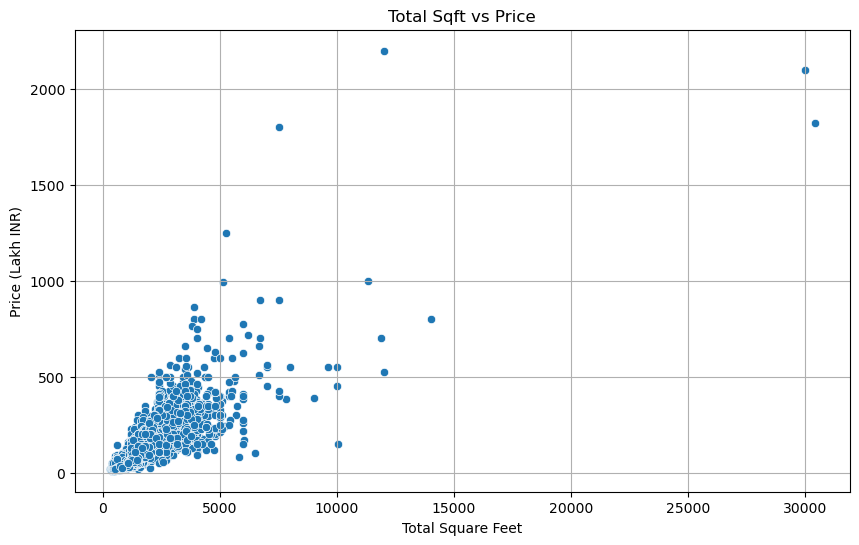

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='total_sqft', y='price')
plt.title('Total Sqft vs Price')
plt.xlabel('Total Square Feet')
plt.ylabel('Price (Lakh INR)')
plt.grid(True)
plt.show()

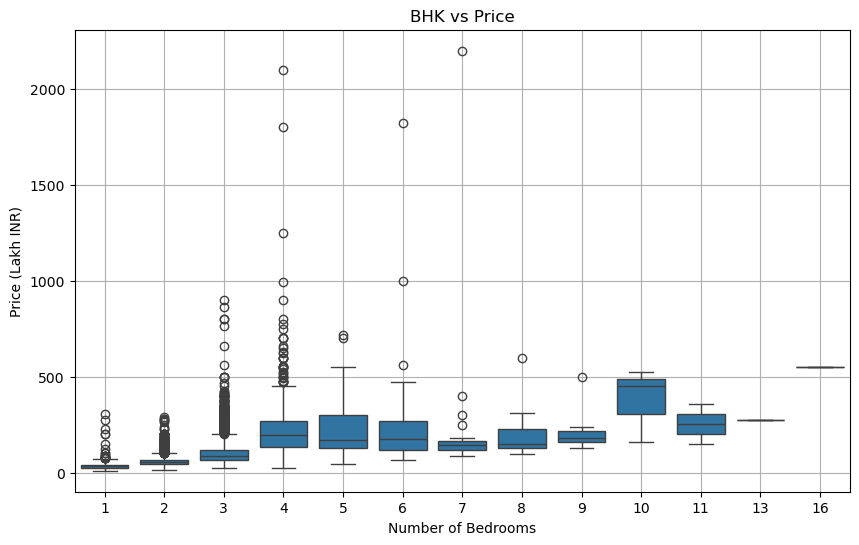

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='bhk', y='price')
plt.title('BHK vs Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (Lakh INR)')
plt.grid(True)
plt.show()


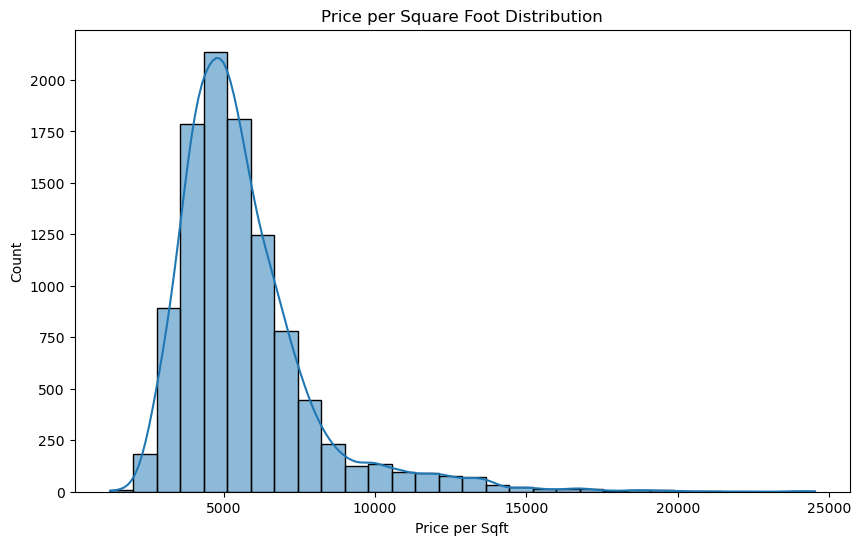

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(df['price_per_sqft'], kde=True, bins=30)
plt.title('Price per Square Foot Distribution')
plt.xlabel('Price per Sqft')
plt.show()


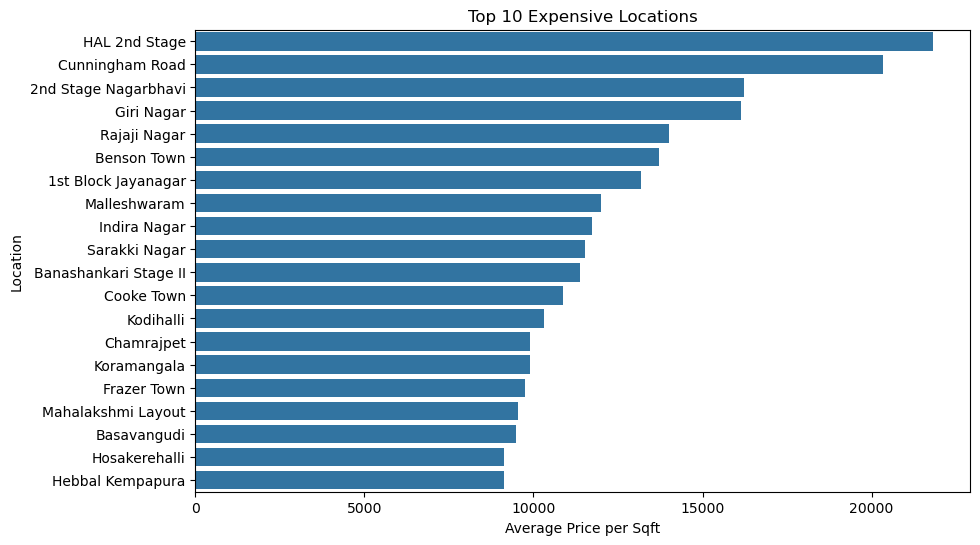

In [28]:
df_raw = pd.read_csv("processed_housing_data.csv")
loc_price = df_raw.groupby('location')['price_per_sqft'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=loc_price.values, y=loc_price.index)
plt.title('Top 10 Expensive Locations')
plt.xlabel('Average Price per Sqft')
plt.ylabel('Location')
plt.show()


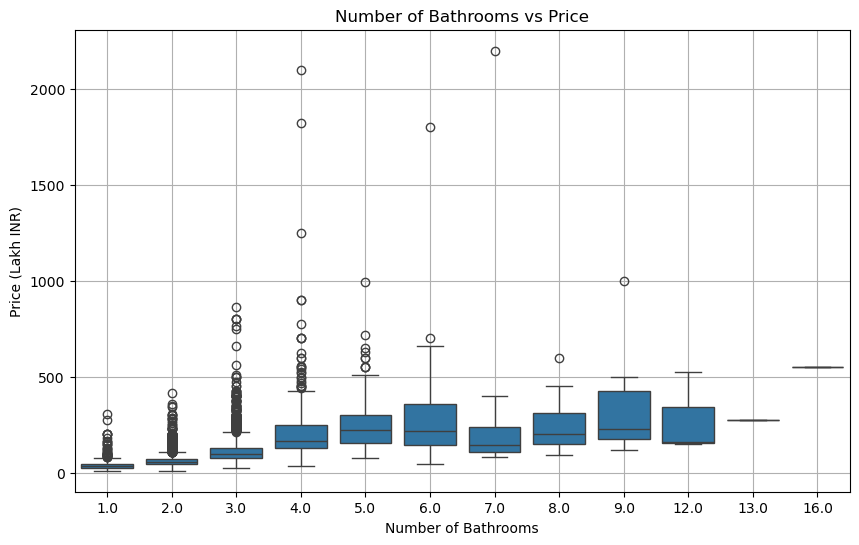

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='bath', y='price')
plt.title('Number of Bathrooms vs Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price (Lakh INR)')
plt.grid(True)
plt.show()


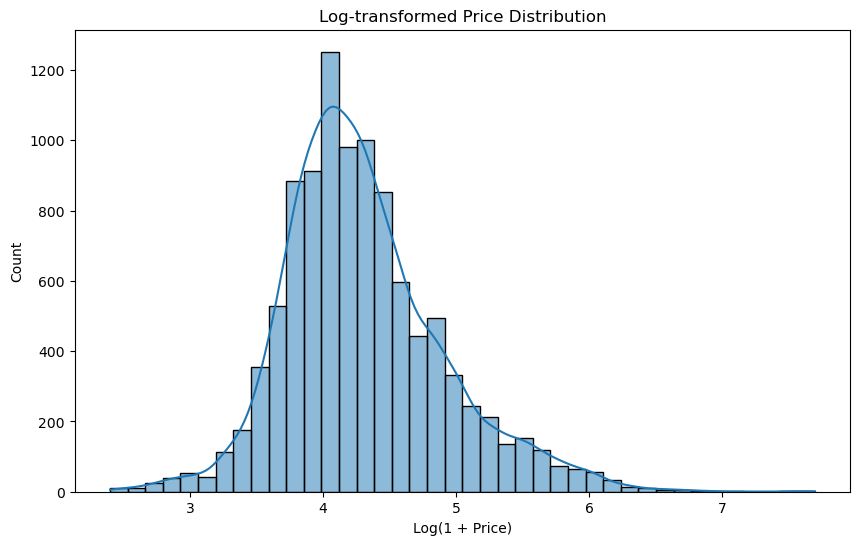

In [30]:
import numpy as np
plt.figure(figsize=(10,6))
sns.histplot(np.log1p(df['price']), bins=40, kde=True)
plt.title("Log-transformed Price Distribution")
plt.xlabel("Log(1 + Price)")
plt.show()


In [31]:
X = df.drop(['price', 'price_per_sqft'], axis=1, errors='ignore')  # features
y = df['price']  # target variable
X = pd.get_dummies(X, drop_first=True)


In [32]:
X.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,availability_21-Nov,availability_21-Oct,availability_21-Sep,availability_22-Dec,availability_22-Jan,availability_22-Jun,availability_22-Mar,availability_22-May,availability_22-Nov,availability_Ready To Move
0,2850.0,4.0,1.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,2.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1200.0,2.0,0.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

print("Linear Regression R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

Linear Regression R² Score: 0.8014967407221586
Mean Absolute Error: 18.991635349356716
Root Mean Squared Error: 33.295346581453515


In [35]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred_rf = rf_model.predict(X_test)

print("Random Forest R² Score:", r2_score(y_test, y_pred_rf))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

Random Forest R² Score: 0.7903369863989477
Mean Absolute Error: 18.31591694086205
Root Mean Squared Error: 33.295346581453515


In [37]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [38]:
!python.exe -m pip install --upgrade pip

In [39]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Step 1: Define and Train the Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Step 2: Predict
y_pred_xgb = xgb_model.predict(X_test)

# Step 3: Evaluate
print("XGBoost R² Score:", r2_score(y_test, y_pred_xgb))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_xgb))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

XGBoost R² Score: 0.7974656509428285
Mean Absolute Error: 19.141800900222382
Root Mean Squared Error: 33.63171880510008


In [40]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
cv_scores = cross_val_score(rf_model, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Average CV score:", np.mean(cv_scores))


Cross-validation scores: [0.56602206 0.68205742 0.57953449 0.67836427 0.68529838]
Average CV score: 0.6382553233238973


In [41]:
import pandas as pd
import numpy as np

def predict_price(model, sqft, bath, bhk, location, X_columns):
    x = np.zeros(len(X_columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if location in X_columns:
        loc_index = X_columns.get_loc(location)
        x[loc_index] = 1

    # Convert to DataFrame with correct column names
    x_df = pd.DataFrame([x], columns=X_columns)
    
    return round(model.predict(x_df)[0], 2)

predict_price(lr_model, 1200, 2, 2, 'Indira Nagar', X.columns)


151.54

In [49]:
import pickle

with open('Desktop/House_Price_Predict/model/model.kpl', 'wb') as f:
    pickle.dump(lr_model, f)


In [56]:
import json

columns = {
    'data_columns': [col for col in X.columns]
}

with open("Desktop/House_Price_Predict/datacolumns.json", "w") as f:
    json.dump(columns, f)
